In [6]:
import os 
import cv2
import sys  
import time 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 

import tensorflow as tf 
import tensorflow_hub as hub

from google.colab import drive 
from google.colab.patches import cv2_imshow 

In [4]:
def show_version():
    print(f"=======Version Information=======")
    print(f"python : {sys.version}")
    print(f"numpy : {np.__version__}")
    print(f"tensorflow : {tf.__version__}")
    print(f"tensorflow hub : {hub.__version__}")
    print(f"matplotlib : {matplotlib.__version__}")

In [7]:
show_version()

=======Version Information=======
python : 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
numpy : 1.21.6
tensorflow : 2.8.2
tensorflow hub : 0.12.0
matplotlib : 3.2.2


In [8]:
!mkdir ./data
!mkdir ./pretrained

In [61]:
!wget -O ./data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
!wget -O ./data/baseball01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/baseball01.jpg
!wget -O ./data/Jonh_Wick_small.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true
!wget -O ./data/seoul.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/c/c4/Gangnam_Seoul_January_2009.jpg/1280px-Gangnam_Seoul_January_2009.jpg
!wget -O ./data/intersection.jpg https://news.mit.edu/sites/default/files/styles/news_article__image_gallery/public/images/202205/MIT_Eco-Driving-01_0.jpg?itok=tHw5dBk-

--2022-07-19 07:10:57--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘./data/beatles01.jpg’

./data/beatles01.jp 100%[===================>] 374.14K  --.-KB/s    in 0.04s   

2022-07-19 07:10:57 (10.2 MB/s) - ‘./data/beatles01.jpg’ saved [383118/383118]

--2022-07-19 07:10:57--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/baseball01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7627

In [11]:
module_handle = "https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2"
detector_model = hub.load(module_handle)

In [12]:
image_array_np = cv2.imread('/content/data/beatles01.jpg')

image_array = image_array_np[np.newaxis, ...]
print(image_array_np.shape, image_array.shape)

start_time = time.time()

result = detector_model(image_array)
print(f'elapsed time: {time.time()-start_time}')


(633, 806, 3) (1, 633, 806, 3)
elapsed time: 6.124461650848389


In [ ]:
print(result)

In [28]:
labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}

In [29]:
def get_ssd_detector(module_handle="https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2"):
  detector = hub.load(module_handle)
  return detector

detector_model = get_ssd_detector()

(700, 1280, 3)
(1, 700, 1280, 3)
(4,)
car:0.7101
(4,)
traffic light:0.6851
(4,)
car:0.6408
(4,)
car:0.6168
(4,)
car:0.6024
(4,)
car:0.5801
(4,)
traffic light:0.5795
(4,)
traffic light:0.5349
(4,)
car:0.5273
(4,)
car:0.5265
(4,)
car:0.5264
(4,)
car:0.5245
(4,)
car:0.5216
(4,)
car:0.5200
(4,)
car:0.5172
(4,)
car:0.5141
(4,)
car:0.5032


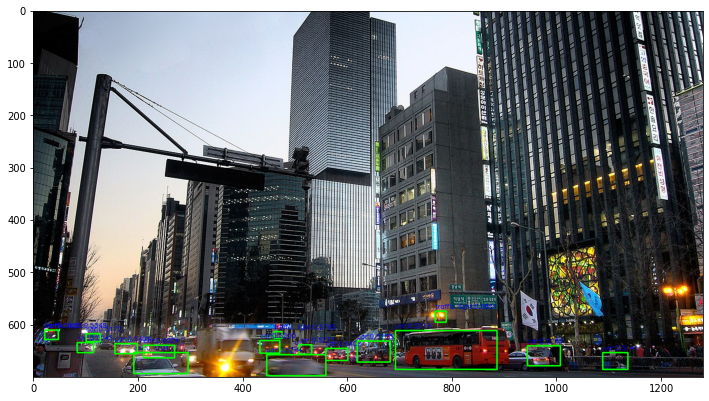

In [44]:
image_array = cv2.cvtColor(cv2.imread("./data/seoul.jpg"), cv2.COLOR_BGR2RGB)

print(image_array.shape)
height = image_array.shape[0]
width = image_array.shape[1]

draw_image = image_array.copy()

green_color = (0, 255, 0)
red_color = (0, 0, 255)

image_tensor = tf.convert_to_tensor(image_array, dtype=tf.uint8)[tf.newaxis, ...]
print(image_tensor.shape)

result = detector_model(image_tensor)
result = {k:v.numpy() for k, v in result.items()}


SCORE_THRESHOLD = 0.5 
OBJECT_DEFAULT_COUNT = 100 

for i in range(min(result["detection_scores"][0].shape[0], OBJECT_DEFAULT_COUNT)):
    score = result["detection_scores"][0, i]
    if score< SCORE_THRESHOLD :
        break
    
    box = result["detection_boxes"][0, i]
    print(box.shape)

    left = box[1] * width 
    top = box[0] * height 
    right = box[3] * width 
    bottom = box[2] * height

    class_id = result["detection_classes"][0, i]
    caption = "{}:{:.4f}".format(labels_to_names[class_id], score)

    print(caption)

    cv2.rectangle(draw_image, (int(left), int(top)), (int(right), int(bottom)), color=green_color, thickness=2) 
    cv2.putText(draw_image , caption, (int(left), int(top-5)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, 1)

plt.figure(figsize=(12, 12))
plt.imshow(draw_image)


In [55]:
def get_detected_image(model, image_array, score_threshold, object_show_count, is_print=True):
    height = image_array.shape[0]
    width  = image_array.shape[1]

    draw_image = image_array.copy()

    green_color = (0, 255, 0)
    red_color = (0, 0, 255)

    image_tensor = tf.convert_to_tensor(image_array, dtype=tf.uint8)[tf.newaxis, ...]

    start_time = time.time()

    result = model(image_tensor)

    result = {k:v.numpy() for k, v in result.items()}

    for i in range(min(result["detection_scores"][0].shape[0],  object_show_count)):
        score = result["detection_scores"][0, i]
        if score < score_threshold:
            break 
        box = result["detection_boxes"][0, i]

        left = box[1] * width 
        top = box[0] * height
        right = box[3] * width 
        bottom = box[2] * height

        class_id = result["detection_classes"][0, i]
        caption = "{}:{:.5f}".format(labels_to_names[class_id], score)
        print(caption)

        cv2.rectangle(draw_image, (int(left), int(top)), (int(right), int(bottom)), color=green_color, thickness=2)
        cv2.putText(draw_image, caption, (int(left), int(top-5)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, 1)

    if is_print : 
        print(f"detection time {round(time.time() - start_time, 2)} ")
    

    return draw_image 


car:0.57553
car:0.55395
car:0.54433
car:0.54150
car:0.53833
person:0.52973
car:0.51530
car:0.51055
car:0.50495
car:0.50479
person:0.50422
car:0.50281
detection time 0.1 


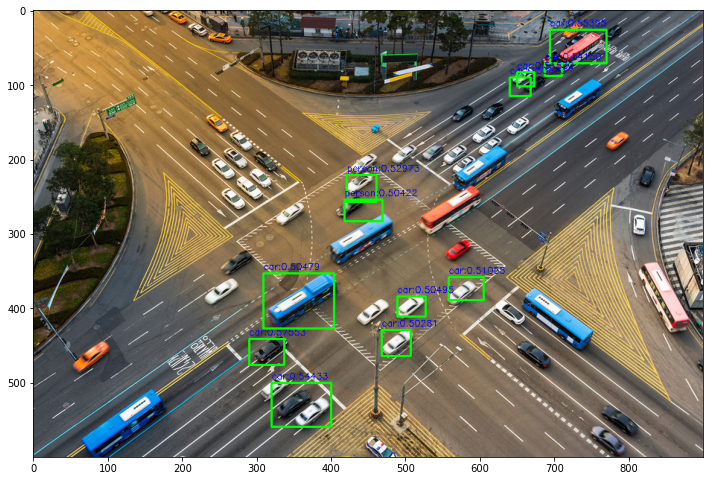

In [65]:
img_array = cv2.cvtColor(cv2.imread('/content/data/intersection.jpg'), cv2.COLOR_BGR2RGB)
draw_img = get_detected_image(detector_model, img_array, score_threshold=0.5, object_show_count=100, is_print=True)

plt.figure(figsize=(12, 12))
plt.imshow(draw_img)

In [76]:
def get_detected_video(model, input_path, output_path, score_threshold, is_print):
    cap = cv2.VideoCapture(input_path)

    codec = cv2.VideoWriter_fourcc(*"XVID")

    video_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    video_fps = cap.get(cv2.CAP_PROP_FPS)

    video_writer = cv2.VideoWriter(output_path, codec, video_fps, video_size)

    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"frame count {frame_count}")

    green_color = (0, 255, 0)
    red_color = (0, 0, 255)

    while True :
        has_frame, image_frame = cap.read()
        if not has_frame:
            print("no more frames to process")
            break
        image_frame = get_detected_image(model, image_frame, score_threshold=score_threshold, object_show_count=100, is_print=is_print)

        video_writer.write(image_frame)

    video_writer.release()
    cap.release()



In [77]:
get_detected_video(detector_model, '/content/data/Jonh_Wick_small.mp4', './data/John_Wick_small_02.mp4', 0.5, True)

frame count 58
car:0.67854
car:0.56978
car:0.53945
detection time 0.11 
car:0.69463
car:0.57630
car:0.53948
detection time 0.12 
motorcycle:0.62259
person:0.58403
car:0.55594
detection time 0.11 
car:0.53588
person:0.53479
car:0.52278
detection time 0.11 
car:0.62812
car:0.62540
motorcycle:0.60971
person:0.58420
detection time 0.11 
car:0.62414
person:0.60534
car:0.52795
detection time 0.13 
car:0.63067
person:0.59815
car:0.51575
detection time 0.14 
car:0.69524
person:0.60580
motorcycle:0.52570
motorcycle:0.51504
detection time 0.12 
person:0.69233
car:0.62804
motorcycle:0.55110
car:0.51265
detection time 0.11 
person:0.68498
car:0.64657
car:0.59457
motorcycle:0.53248
detection time 0.12 
car:0.66268
car:0.62655
person:0.50248
detection time 0.11 
car:0.66677
car:0.64453
person:0.53971
motorcycle:0.50679
detection time 0.12 
person:0.59293
car:0.53496
detection time 0.11 
person:0.61495
car:0.55734
car:0.55097
person:0.51055
person:0.50074
detection time 0.13 
person:0.61232
car:0.550